Room Occupancy Estimation

1.Introduction: Understanding room occupancy patterns is crucial for optimizing energy efficiency, improving building automation, and enhancing space utilization. This project focuses on performing Exploratory Data Analysis (EDA) on a room occupancy dataset that contains sensor readings such as temperature, light, sound, CO₂ levels, and motion detection. The dataset includes time-series data collected from multiple sensors, recording environmental conditions and occupancy counts. By analyzing these factors, we aim to uncover patterns, correlations, and potential outliers that influence room occupancy.

2.Goal of the Project: The primary goal of this project is to analyze room occupancy patterns using sensor data to gain insights into environmental factors influencing occupancy

3.Data Story/Source: Source of the data is from UC Irvine Machine Learning Repository. https://archive.ics.uci.edu/dataset/864/room+occupancy+estimation

In [10]:
import pandas as pd  # For data manipulation
import numpy as np   # For numerical computations
import os            # For file operations
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns            # For enhanced data visualization
from scipy import stats

In [11]:
# load the dataset
data = pd.read_csv("C:\\Users\\ARCHANA\\Documents\\Occupancy_Estimation.csv")

data

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,2018/01/11,08:58:07,25.06,25.13,24.69,25.31,6,7,33,22,0.09,0.04,0.06,0.08,345,0.000000,0,0,0
10125,2018/01/11,08:58:37,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,0.05,0.08,345,0.000000,0,0,0
10126,2018/01/11,08:59:08,25.13,25.06,24.69,25.25,6,7,34,22,0.11,0.05,0.06,0.08,345,0.000000,0,0,0
10127,2018/01/11,08:59:39,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.08,0.10,0.08,345,0.000000,0,0,0


In [12]:
import os
print(os.listdir())  # Lists all files in the current directory


['.ipynb_checkpoints', 'assignment_7.ipynb', 'Cleaned_Occupancy_Estimation.csv', 'data.csv', 'ENTRI PYTHON', 'intermediate &phase_1.ipynb', 'Intermediate phase submition.ipynb', 'mhealth+dataset.zip', 'myexcel - myexcel.csv.csv', 'phase_2-Copy1.ipynb', 'phase_2-Copy2.ipynb', 'phase_2.ipynb', 'Untitled.ipynb', 'Untitled1.ipynb']


4.Understand the data structure

In [14]:
data.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

5.Handle Missing Data

In [17]:
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64


6..Handle Duplicates

In [19]:
data.duplicated().sum()

0

7.Print the shape of the dataset

In [21]:
# Print the shape of the dataset
print("Shape of the dataset:", data.shape)

Shape of the dataset: (10129, 19)


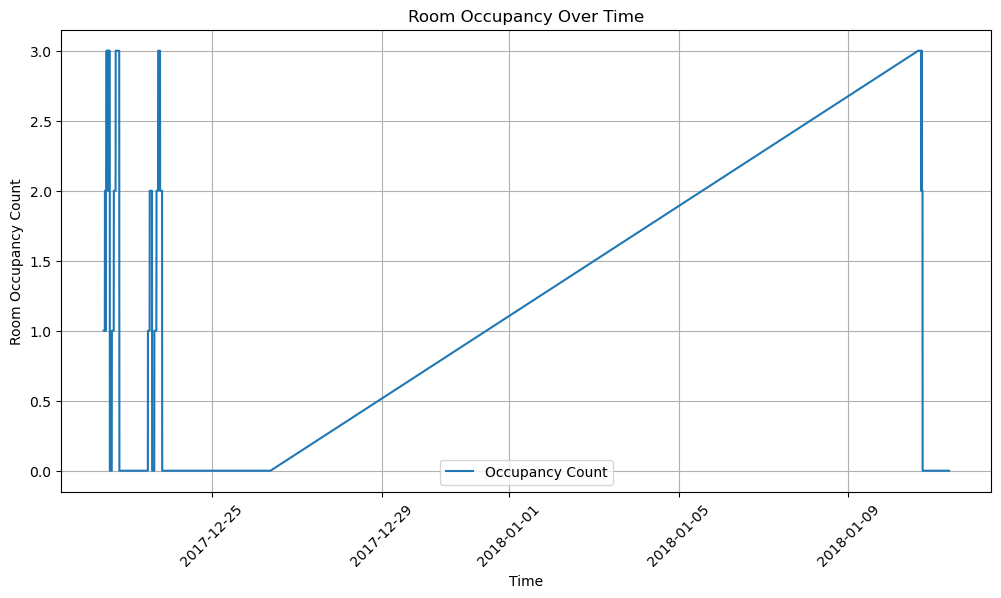

In [22]:
import matplotlib.pyplot as plt

# Convert Date and Time to datetime format for better visualization
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])

# Plot Room Occupancy Count over time
plt.figure(figsize=(12, 6))
plt.plot(data['Datetime'], data['Room_Occupancy_Count'], label="Occupancy Count")

# Formatting
plt.xlabel("Time")
plt.ylabel("Room Occupancy Count")
plt.title("Room Occupancy Over Time")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [23]:
import pandas as pd
import numpy as np



# Select only numeric columns for outlier detection
numeric_cols = data.select_dtypes(include=[np.number])

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_cleaned = data[~((numeric_cols < lower_bound) | (numeric_cols > upper_bound)).any(axis=1)]

# Print dataset shape before and after outlier removal
print("Original dataset shape:", data.shape)
print("Cleaned dataset shape:", data_cleaned.shape)

# Save the cleaned dataset
data_cleaned.to_csv("Cleaned_Occupancy_Estimation.csv", index=False)
print("Cleaned dataset ")


Original dataset shape: (10129, 20)
Cleaned dataset shape: (5787, 20)
Cleaned dataset 


Handle outliers

In [25]:
from scipy import stats
# Define columns to check for outliers
columns_to_check = ['S1_Light', 'S2_Light', 'S3_Light', 'S4_Light', 
                    'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound', 
                    'S5_CO2']

# Filter out outliers using Z-score
z_scores = stats.zscore(data[columns_to_check])
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data_zscore_cleaned = data[filtered_entries]
# Print dataset shape before and after Z-score filtering
print("Original dataset shape:", data.shape)
print("Dataset shape after Z-score filtering:", data_zscore_cleaned.shape)
print(f"Data after Z-score filtering: {data_zscore_cleaned.shape[0]} rows")


Original dataset shape: (10129, 20)
Dataset shape after Z-score filtering: (9015, 20)
Data after Z-score filtering: 9015 rows


In [26]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Compute skewness
skewness_values = numeric_data.skew()

print(skewness_values)

S1_Temp                  0.953613
S2_Temp                  2.355681
S3_Temp                  0.650162
S4_Temp                  0.129630
S1_Light                 1.820428
S2_Light                 2.827817
S3_Light                 2.100069
S4_Light                 1.357618
S1_Sound                 5.450448
S2_Sound                 6.881610
S3_Sound                 5.994767
S4_Sound                10.952134
S5_CO2                   1.975692
S5_CO2_Slope             0.287967
S6_PIR                   2.862811
S7_PIR                   3.107460
Room_Occupancy_Count     2.057635
dtype: float64


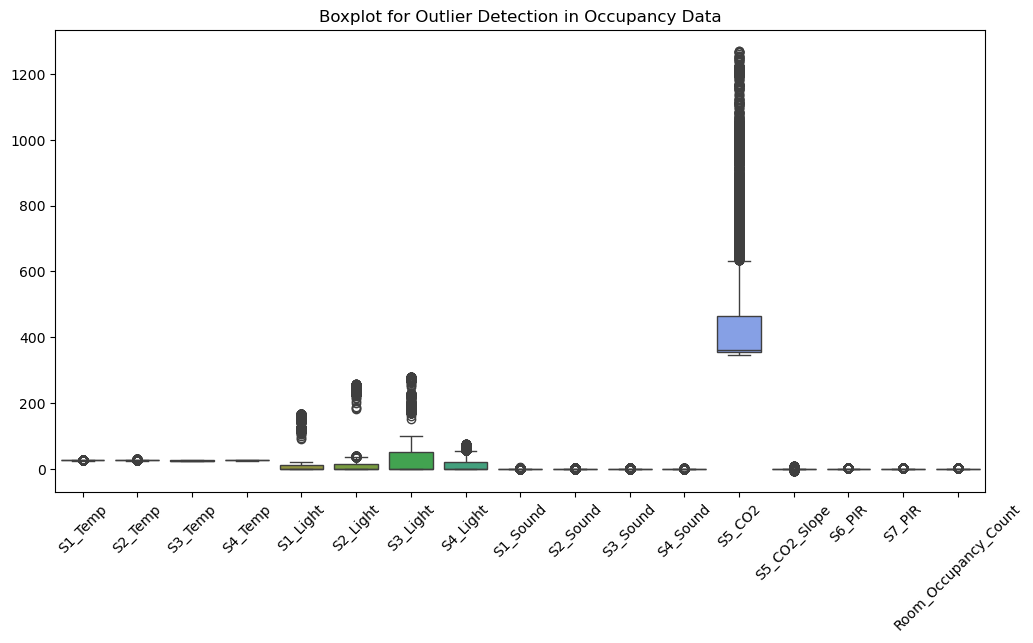

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Set plot size
plt.figure(figsize=(12, 6))

# Create boxplots
sns.boxplot(data=numeric_data)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.title("Boxplot for Outlier Detection in Occupancy Data")
plt.show()

In [28]:
import pandas as pd

# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Compute skewness
skewness_values = numeric_data.skew()

print(skewness_values)


S1_Temp                  0.953613
S2_Temp                  2.355681
S3_Temp                  0.650162
S4_Temp                  0.129630
S1_Light                 1.820428
S2_Light                 2.827817
S3_Light                 2.100069
S4_Light                 1.357618
S1_Sound                 5.450448
S2_Sound                 6.881610
S3_Sound                 5.994767
S4_Sound                10.952134
S5_CO2                   1.975692
S5_CO2_Slope             0.287967
S6_PIR                   2.862811
S7_PIR                   3.107460
Room_Occupancy_Count     2.057635
dtype: float64


In [29]:
import numpy as np

# Apply log transformation (Add 1 to avoid log(0))
data_transformed = np.log1p(data[['S2_Temp', 'S1_Light', 'S2_Light', 'S3_Light', 
                                  'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 
                                  'S4_Sound', 'S5_CO2', 'S6_PIR', 'S7_PIR', 'Room_Occupancy_Count']])

# Check new skewness
print(data_transformed.skew())

S2_Temp                 2.263187
S1_Light                0.981875
S2_Light                1.087114
S3_Light                0.478124
S4_Light                0.481067
S1_Sound                3.708157
S2_Sound                4.543269
S3_Sound                4.708174
S4_Sound                6.112949
S5_CO2                  1.575527
S6_PIR                  2.862811
S7_PIR                  3.107460
Room_Occupancy_Count    1.822681
dtype: float64


Interpretation of Skewness After Log Transformation Reduced Skewness:

S1_Light (0.98), S2_Light (1.08), S3_Light (0.48), S4_Light (0.48), S5_CO2 (1.58), Room_Occupancy_Count (1.82)

Still Highly Skewed (>3.0):

S1_Sound (3.71), S2_Sound (4.54), S3_Sound (4.71), S4_Sound (6.11)

S6_PIR (2.86), S7_PIR (3.11), S2_Temp (2.26)



In [31]:
print(data.dtypes)

Date                            object
Time                            object
S1_Temp                        float64
S2_Temp                        float64
S3_Temp                        float64
S4_Temp                        float64
S1_Light                         int64
S2_Light                         int64
S3_Light                         int64
S4_Light                         int64
S1_Sound                       float64
S2_Sound                       float64
S3_Sound                       float64
S4_Sound                       float64
S5_CO2                           int64
S5_CO2_Slope                   float64
S6_PIR                           int64
S7_PIR                           int64
Room_Occupancy_Count             int64
Datetime                datetime64[ns]
dtype: object


In [32]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

In [33]:
print(data.columns)

Index(['Date', 'Time', 'S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light',
       'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound',
       'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR',
       'Room_Occupancy_Count', 'Datetime'],
      dtype='object')


In [34]:
import numpy as np
import pandas as pd
from scipy.stats import boxcox

# Select only numeric columns
data_numeric = data.select_dtypes(include=['number'])

# Ensure all values are positive
for col in data_numeric.columns:
    min_value = data_numeric[col].min()
    if min_value <= 0:  # If any value is 0 or negative, shift it
        data_numeric[col] = data_numeric[col] + abs(min_value) + 1

# Apply Box-Cox transformation
data_boxcox = data_numeric.copy()
for col in data_numeric.columns:
    data_boxcox[col], _ = boxcox(data_numeric[col])  # No need to add 1 now

# Check skewness
print(data_boxcox.skew())

S1_Temp                 0.000000
S2_Temp                 0.000000
S3_Temp                 0.000000
S4_Temp                 0.000000
S1_Light                0.530023
S2_Light                0.504801
S3_Light                0.339625
S4_Light                0.343497
S1_Sound                0.880594
S2_Sound                0.739027
S3_Sound                0.846520
S4_Sound                0.124903
S5_CO2                  0.000000
S5_CO2_Slope            0.402710
S6_PIR                  2.862811
S7_PIR                  3.107460
Room_Occupancy_Count    1.601268
dtype: float64


In [35]:
data_boxcox["S6_PIR"] = np.log1p(data_numeric["S6_PIR"])
data_boxcox["S7_PIR"] = np.log1p(data_numeric["S7_PIR"])
data_boxcox["Room_Occupancy_Count"] = np.log1p(data_numeric["Room_Occupancy_Count"])


In [36]:
data_boxcox.skew()

S1_Temp                 0.000000
S2_Temp                 0.000000
S3_Temp                 0.000000
S4_Temp                 0.000000
S1_Light                0.530023
S2_Light                0.504801
S3_Light                0.339625
S4_Light                0.343497
S1_Sound                0.880594
S2_Sound                0.739027
S3_Sound                0.846520
S4_Sound                0.124903
S5_CO2                  0.000000
S5_CO2_Slope            0.402710
S6_PIR                  2.862811
S7_PIR                  3.107460
Room_Occupancy_Count    1.887360
dtype: float64

In [37]:
# Check the first few rows
print(data.head())

# Check data types and missing values
print(data.info())

# Summary statistics
print(data.describe())


        Date      Time  S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  \
0 2017-12-22  10:49:41    24.94    24.75    24.56    25.38       121   
1 2017-12-22  10:50:12    24.94    24.75    24.56    25.44       121   
2 2017-12-22  10:50:42    25.00    24.75    24.50    25.44       121   
3 2017-12-22  10:51:13    25.00    24.75    24.56    25.44       121   
4 2017-12-22  10:51:44    25.00    24.75    24.56    25.44       121   

   S2_Light  S3_Light  S4_Light  S1_Sound  S2_Sound  S3_Sound  S4_Sound  \
0        34        53        40      0.08      0.19      0.06      0.06   
1        33        53        40      0.93      0.05      0.06      0.06   
2        34        53        40      0.43      0.11      0.08      0.06   
3        34        53        40      0.41      0.10      0.10      0.09   
4        34        54        40      0.18      0.06      0.06      0.06   

   S5_CO2  S5_CO2_Slope  S6_PIR  S7_PIR  Room_Occupancy_Count  \
0     390      0.769231       0       0            

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
Datetime                0
dtype: int64


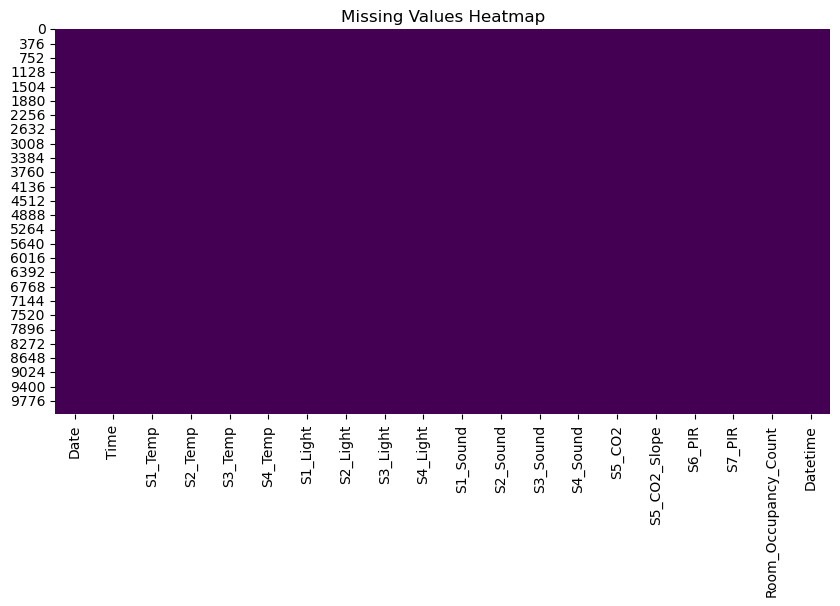

In [38]:
#Missing Values Analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Check missing values count
print(data.isnull().sum())

# Visualizing missing values
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


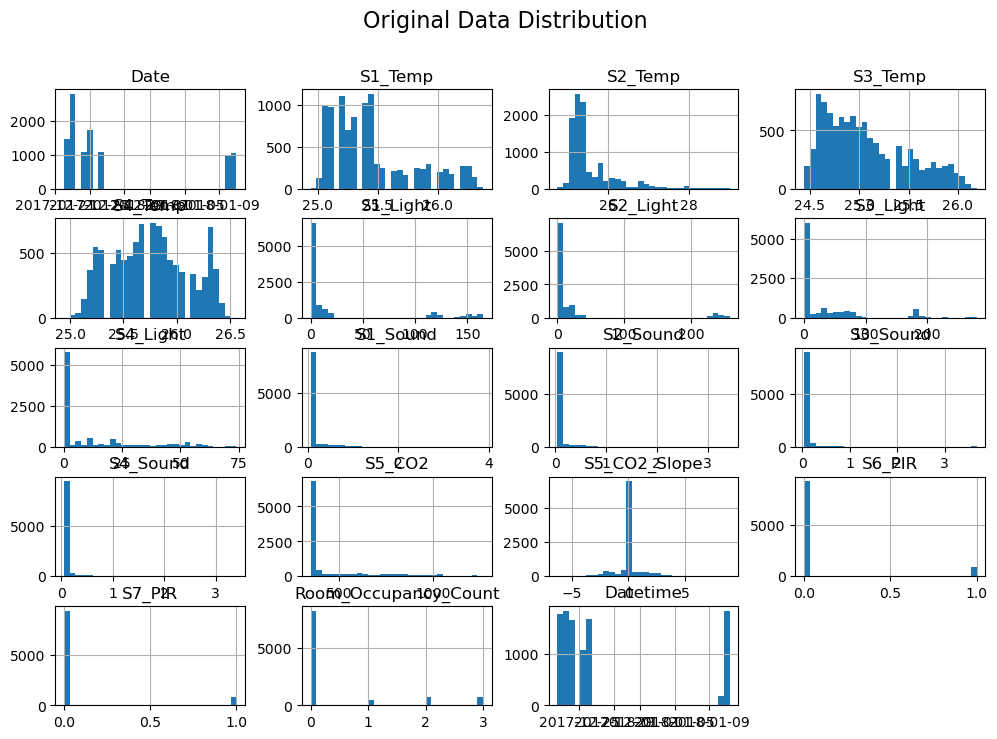

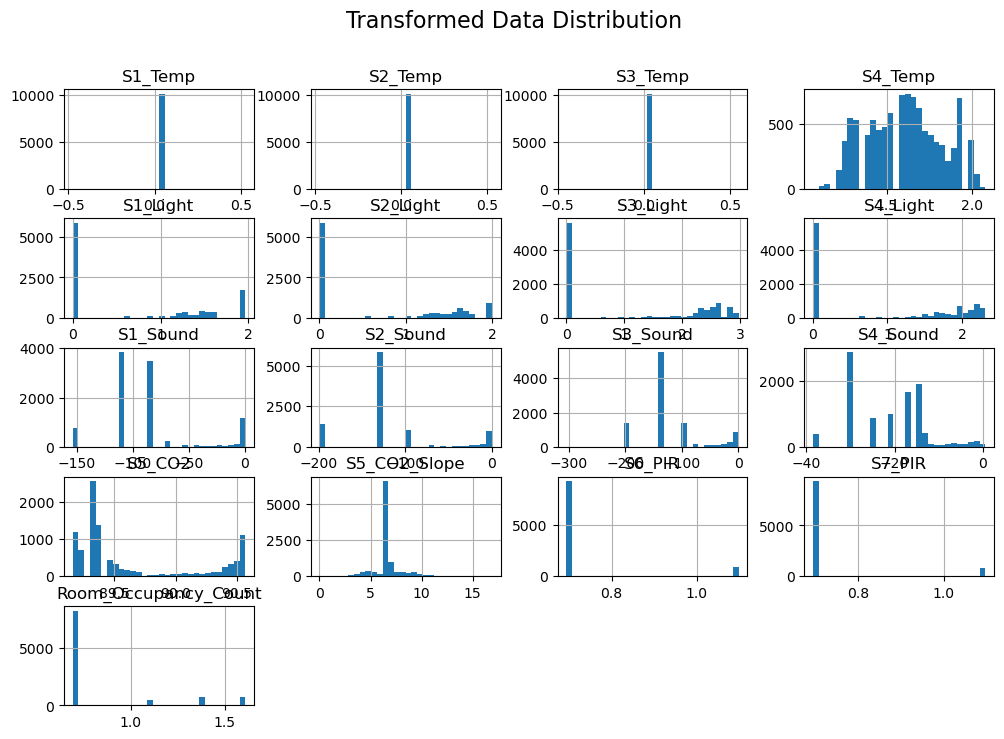

In [39]:
#Visualizing Distributions (Before & After Transformation)
# Histograms for original data
data.hist(figsize=(12,8), bins=30)
plt.suptitle("Original Data Distribution", fontsize=16)
plt.show()

# Histograms for transformed data
data_boxcox.hist(figsize=(12,8), bins=30)
plt.suptitle("Transformed Data Distribution", fontsize=16)
plt.show()


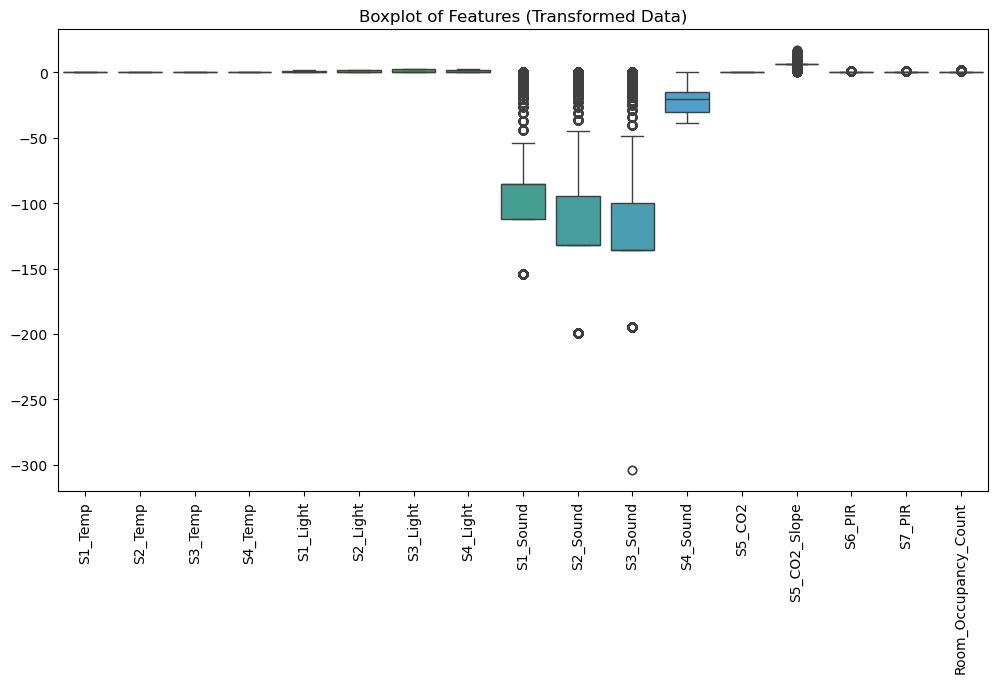

In [40]:
#Boxplots for Outlier Detection
plt.figure(figsize=(12,6))
sns.boxplot(data=data_boxcox)
plt.xticks(rotation=90)
plt.title("Boxplot of Features (Transformed Data)")
plt.show()


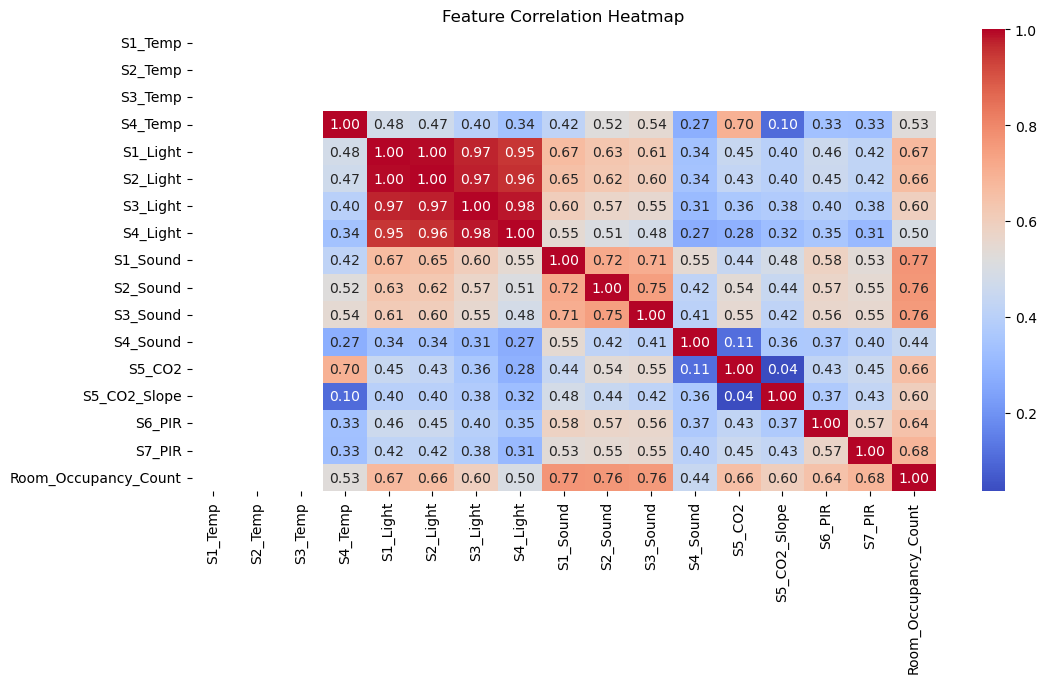

In [41]:
#Correlation Analysis
# Heatmap of correlations
plt.figure(figsize=(12,6))
sns.heatmap(data_boxcox.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

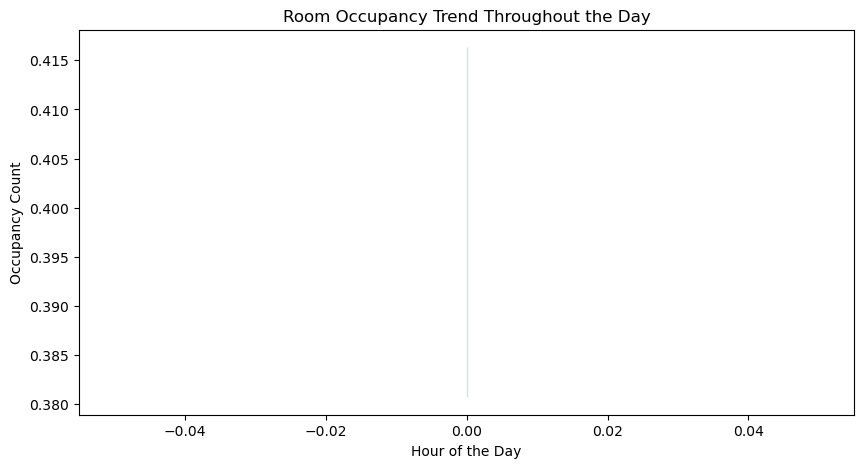

In [42]:
#Occupancy Trends Over Time
data["Date"] = pd.to_datetime(data["Date"])
data["Hour"] = data["Date"].dt.hour

plt.figure(figsize=(10,5))
sns.lineplot(x="Hour", y="Room_Occupancy_Count", data=data)
plt.title("Room Occupancy Trend Throughout the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Occupancy Count")
plt.show()


Occupancy Trends If plotted over time: Occupancy fluctuates with hours of the day (e.g., peak times in morning/afternoon). PIR sensor activity aligns with occupancy changes. CO2 levels may rise in occupied periods.

Univariate Analysis 

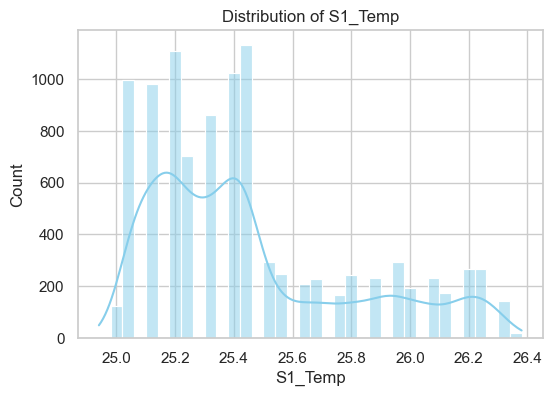

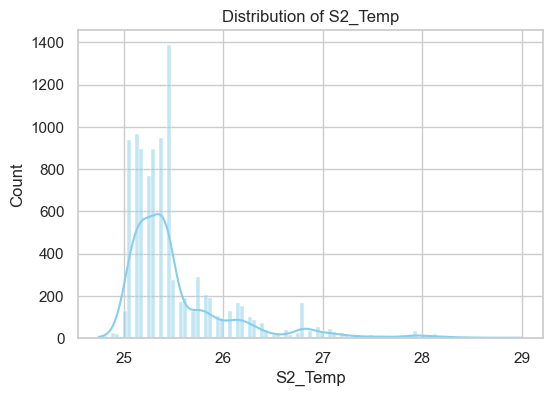

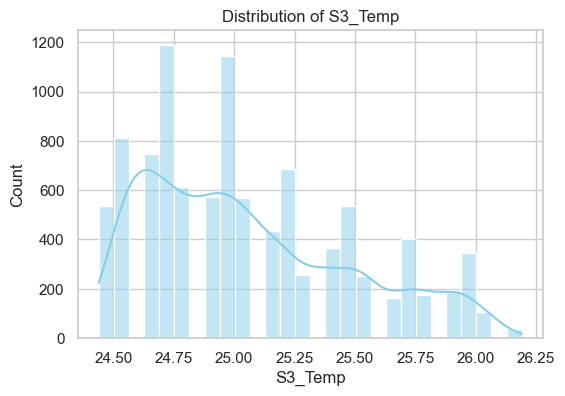

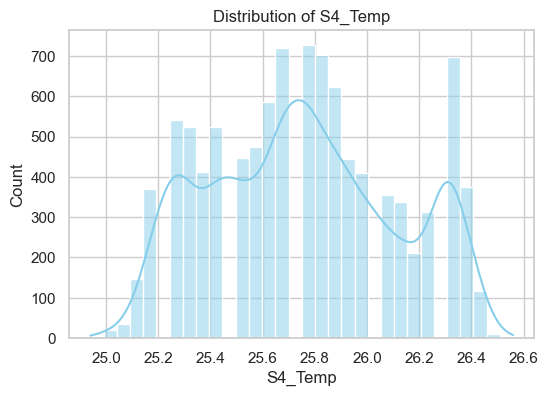

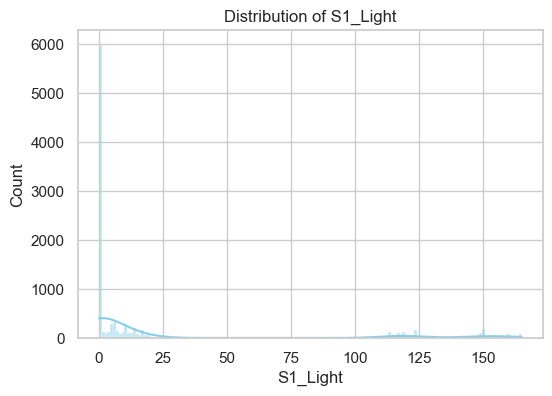

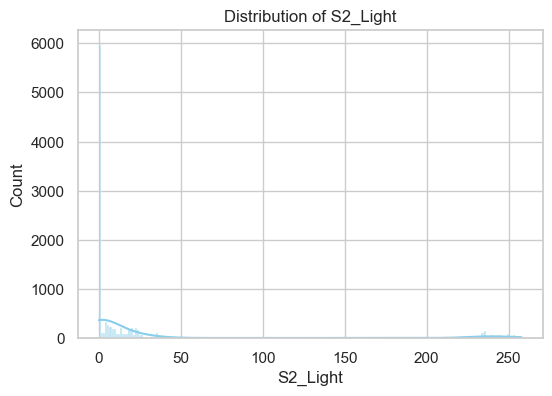

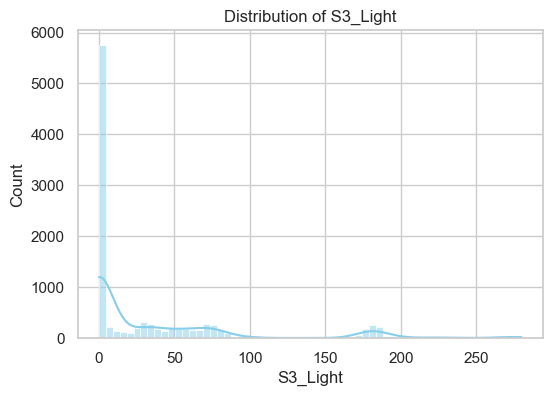

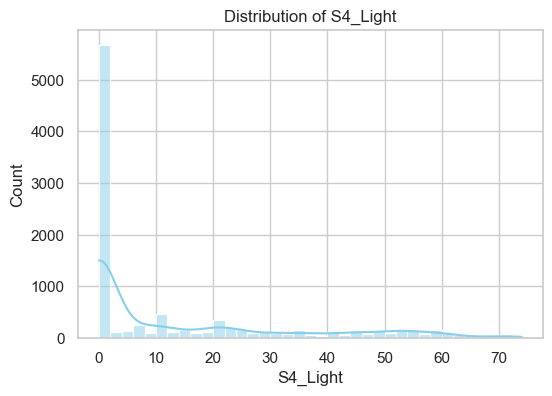

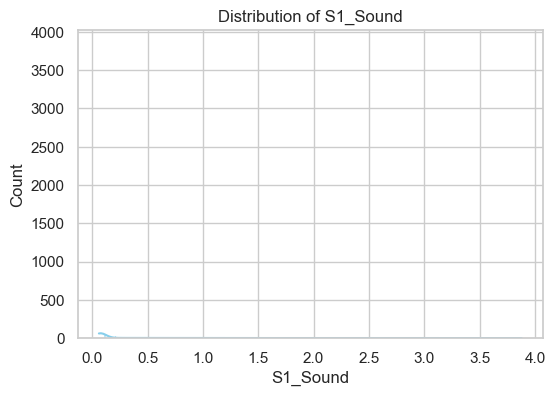

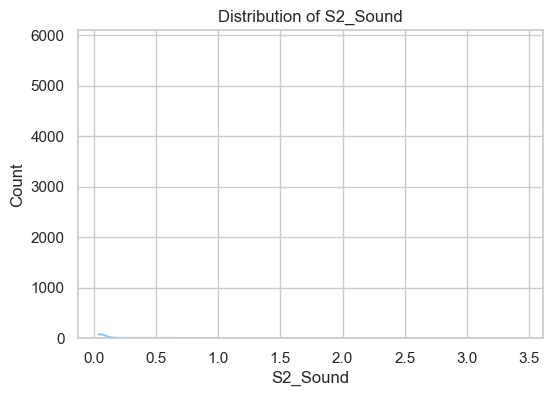

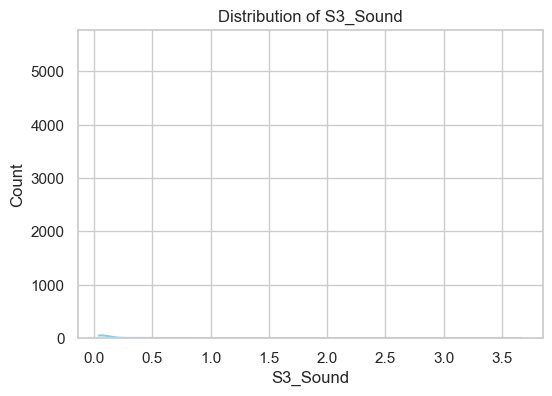

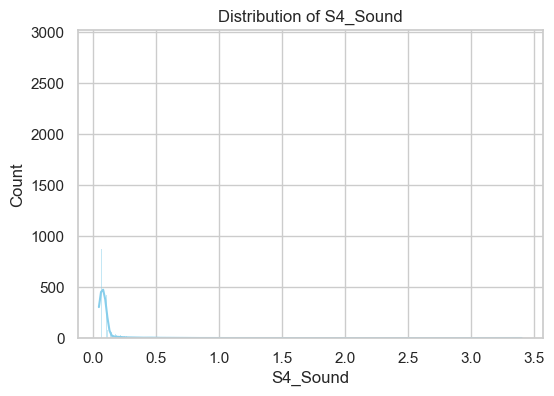

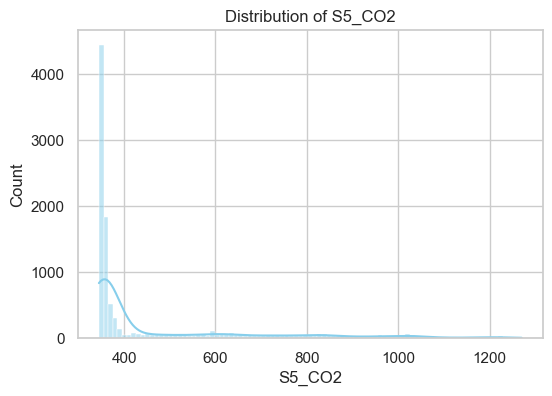

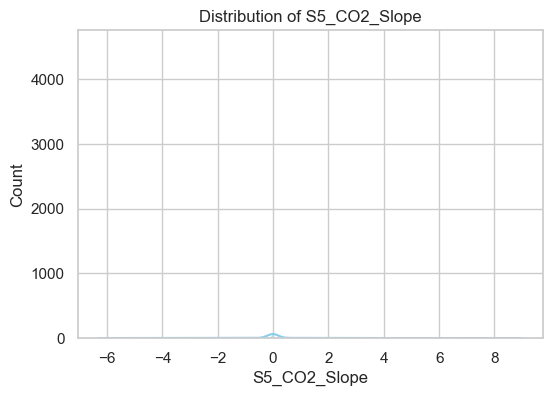

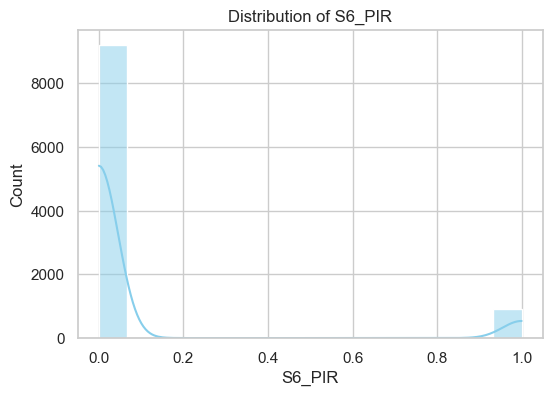

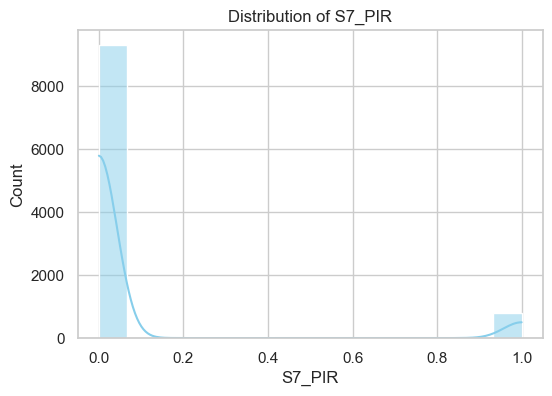

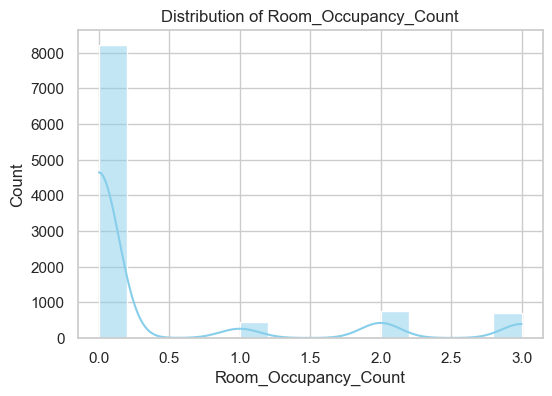

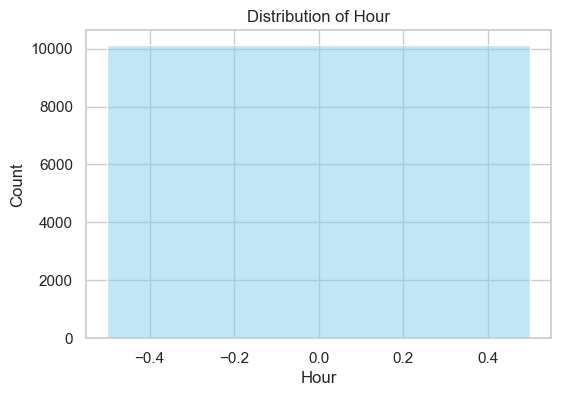

NameError: name 'df' is not defined

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Example: Histograms for numerical features
numerical_cols = data.select_dtypes(include='number').columns

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.show()
    
# Example: Count plots for categorical features
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col], palette='Set2')
    plt.title(f'Count of categories in {col}')
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
# histogram for numerical features


numerical_cols = data.select_dtypes(include='number').columns

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


 Boxplots for Numerical Features
 

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Pairplot (Multivariate)

In [ ]:
selected_cols = numerical_cols[:4]  # Select first 4 numerical columns
sns.pairplot(data[selected_cols])
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()


 Feature Importance (Tree-based)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Rename your dataset variable
df = data.copy()

# Define the actual target column
target_column = 'Room_Occupancy_Count'

# Drop rows with missing target if any
df_model = df.dropna(subset=[target_column])

# Drop columns that are not useful (like Date/Time strings)
df_model = df_model.drop(columns=['Date', 'Time', 'Datetime'], errors='ignore')

# One-hot encode categorical variables
X = pd.get_dummies(df_model.drop(target_column, axis=1), drop_first=True)
y = df_model[target_column]

# Train ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)

# Plot feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(15).plot(kind='barh', color='teal')
plt.title("Top 15 Important Features")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()


This tells the model what you’re trying to predict.In this dataset, this column likely contains the number of people in the room.
X: This is feature matrix — all input variables (independent variables).
y: This is target vector — the thing you want to predict.This trains an ensemble tree model (similar to a random forest) to learn the relationship between features (X) and target (y).It is Useful because 
Model Interpretation: we know which features to keep or drop.
Feature Selection: we can reduce dimensionality and improve model performance.
Domain Insight: Helps us understand which environmental factors affect occupancy (e.g., temperature, light, CO₂).


Encoding Categorical Features

In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Now apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [ ]:
import pandas as pd
X = data.drop("Room_Occupancy_Count", axis=1)
y = data["Room_Occupancy_Count"]

print(X.describe())


In [ ]:
print(data.columns)


In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop("Room_Occupancy_Count", axis=1)
y = data["Room_Occupancy_Count"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
!pip install xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "XGBoost": XGBClassifier()
}


 Summary of Your Results (before tuning):
 
Model	            Accuracy
LogisticRegression	0.9605
RandomForest	    0.9975
SVM	                0.8156
XGBoost	            0.9970

Hyperparameter Tuning (GridSearchCV / RandomizedSearchCV)

Recommended Next Steps for Feature Selection:
 1. Correlation Analysis

In [50]:
# Drop non-numeric columns
X = data.drop(columns=['Room_Occupancy_Count', 'Date', 'Time', 'Datetime'], errors='ignore')
y = data['Room_Occupancy_Count']

# Fit the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)


RandomForestRegressor()

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


ValueError: could not convert string to float: '10:49:41'

<Figure size 1200x800 with 0 Axes>

In [58]:
print(X.dtypes)


Date            datetime64[ns]
Time                    object
S1_Temp                float64
S2_Temp                float64
S3_Temp                float64
S4_Temp                float64
S1_Light                 int64
S2_Light                 int64
S3_Light                 int64
S4_Light                 int64
S1_Sound               float64
S2_Sound               float64
S3_Sound               float64
S4_Sound               float64
S5_CO2                   int64
S5_CO2_Slope           float64
S6_PIR                   int64
S7_PIR                   int64
Datetime        datetime64[ns]
Hour                     int32
dtype: object


S1_Temp         float64
S2_Temp         float64
S3_Temp         float64
S4_Temp         float64
S1_Light          int64
S2_Light          int64
S3_Light          int64
S4_Light          int64
S1_Sound        float64
S2_Sound        float64
S3_Sound        float64
S4_Sound        float64
S5_CO2            int64
S5_CO2_Slope    float64
S6_PIR            int64
S7_PIR            int64
Hour              int32
dtype: object


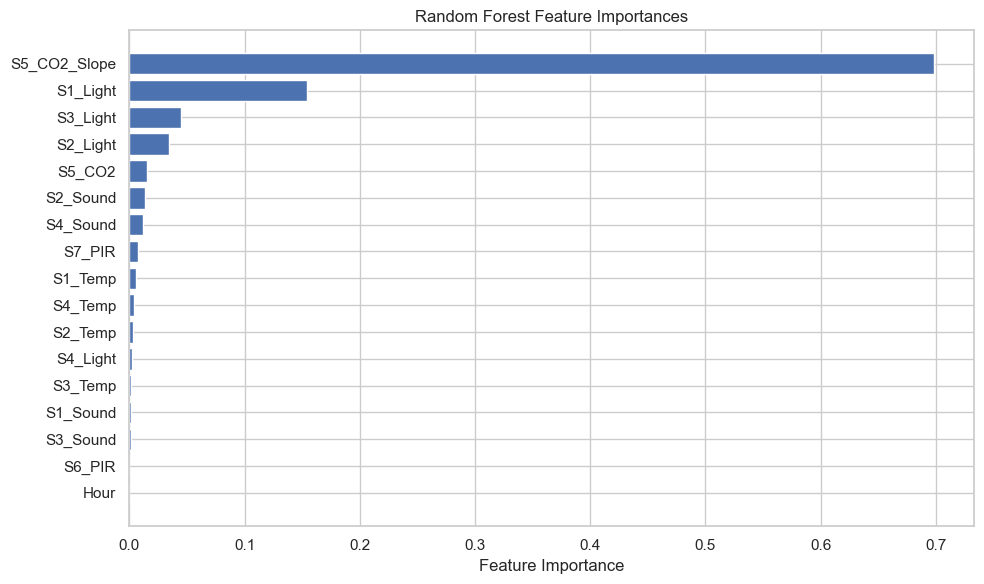

In [60]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Drop non-numeric/time-based columns
X = data.drop(columns=['Room_Occupancy_Count', 'Date', 'Time', 'Datetime'], errors='ignore')
y = data['Room_Occupancy_Count']

# Confirm all features are numeric
print(X.dtypes)

# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Feature importances
importances = model.feature_importances_
feature_names = X.columns

# Visualize
import matplotlib.pyplot as plt
import numpy as np

sorted_idx = np.argsort(importances)
plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()


3. Univariate Feature Selection

In [62]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)
scores = selector.scores_

# Display results
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})
print(feature_scores.sort_values(by='Score', ascending=False))


         Feature         Score
4       S1_Light  26157.430749
6       S3_Light  17167.875558
5       S2_Light  16674.531221
0        S1_Temp   9777.329023
15        S7_PIR   9469.201771
1        S2_Temp   8305.656983
12        S5_CO2   7822.014626
2        S3_Temp   7490.220901
14        S6_PIR   6775.482378
13  S5_CO2_Slope   5729.320098
8       S1_Sound   4969.608954
9       S2_Sound   4575.381371
10      S3_Sound   3991.000393
3        S4_Temp   3884.011658
11      S4_Sound   2722.312383
7       S4_Light   1467.026710
16          Hour      0.000000


 Suggested Feature Selection (based on score):
 features with scores > ~4000 for a cleaner model:

In [65]:
selected_features = [
    'S1_Light', 'S2_Light', 'S3_Light',
    'S1_Temp', 'S2_Temp', 'S3_Temp',
    'S5_CO2', 'S7_PIR', 'S6_PIR', 'S5_CO2_Slope'
]


In [ ]:
# Optional: Drop low-score features
#X_selected = data[selected_features]
#y = data['Room_Occupancy_Count']


#model = RandomForestRegressor(random_state=42)
#model.fit(X_selected, y)


In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Drop non-numeric columns
X = data.drop(columns=['Room_Occupancy_Count', 'Date', 'Time', 'Datetime'], errors='ignore')
y = data['Room_Occupancy_Count']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model with ALL features
model_all = RandomForestRegressor(random_state=42)
model_all.fit(X_train, y_train)
y_pred_all = model_all.predict(X_test)

# Metrics
r2_all = r2_score(y_test, y_pred_all)
mae_all = mean_absolute_error(y_test, y_pred_all)
rmse_all = mean_squared_error(y_test, y_pred_all, squared=False)

### Univariate Feature Selection
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)
scores = selector.scores_

# Select features with score > 4000
threshold = 4000
selected_mask = scores > threshold
selected_features = X.columns[selected_mask]
X_selected = X[selected_features]

# Split selected
X_train_sel, X_test_sel, _, _ = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Model with selected features
model_sel = RandomForestRegressor(random_state=42)
model_sel.fit(X_train_sel, y_train)
y_pred_sel = model_sel.predict(X_test_sel)

# Metrics
r2_sel = r2_score(y_test, y_pred_sel)
mae_sel = mean_absolute_error(y_test, y_pred_sel)
from sklearn.metrics import root_mean_squared_error
rmse_all = root_mean_squared_error(y_test, y_pred_all)


# Compare Results
print("🔍 Model Performance Comparison")
print(f"\n👉 Using ALL Features:\nR²: {r2_all:.4f} | MAE: {mae_all:.2f} | RMSE: {rmse_all:.2f}")
print(f"\n👉 Using Selected Features (score > {threshold}):\nR²: {r2_sel:.4f} | MAE: {mae_sel:.2f} | RMSE: {rmse_sel:.2f}")
print(f"\n🧠 Features used: {list(selected_features)}")


C:\Users\ARCHANA\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


🔍 Model Performance Comparison

👉 Using ALL Features:
R²: 0.9812 | MAE: 0.01 | RMSE: 0.12

👉 Using Selected Features (score > 4000):
R²: 0.9811 | MAE: 0.01 | RMSE: 0.12

🧠 Features used: ['S1_Temp', 'S2_Temp', 'S3_Temp', 'S1_Light', 'S2_Light', 'S3_Light', 'S1_Sound', 'S2_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR']


In [71]:
#hyper parameter tuning
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
import numpy as np

# Define parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Base model
rf = RandomForestRegressor(random_state=42)

# Randomized search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,  # number of combinations to try
    cv=5,
    scoring='r2',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit using selected features
random_search.fit(X_selected, y)

# Best model
best_rf = random_search.best_estimator_

# Predict with tuned model
y_pred_tuned = best_rf.predict(X_test_sel)

# Evaluation
r2 = r2_score(y_test, y_pred_tuned)
mae = mean_absolute_error(y_test, y_pred_tuned)
rmse = root_mean_squared_error(y_test, y_pred_tuned)

print("\n🚀 Tuned Random Forest Results:")
print(f"R²: {r2:.4f} | MAE: {mae:.2f} | RMSE: {rmse:.2f}")
print(f"\n📌 Best Params: {random_search.best_params_}")


Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\ARCHANA\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
35 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ARCHANA\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ARCHANA\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\ARCHANA\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\ARCHANA\anaconda3\Lib\sit


🚀 Tuned Random Forest Results:
R²: 0.9987 | MAE: 0.01 | RMSE: 0.03

📌 Best Params: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}
